GANs are an emergent class of deep learning algorithms that generate incredibly realistic images.

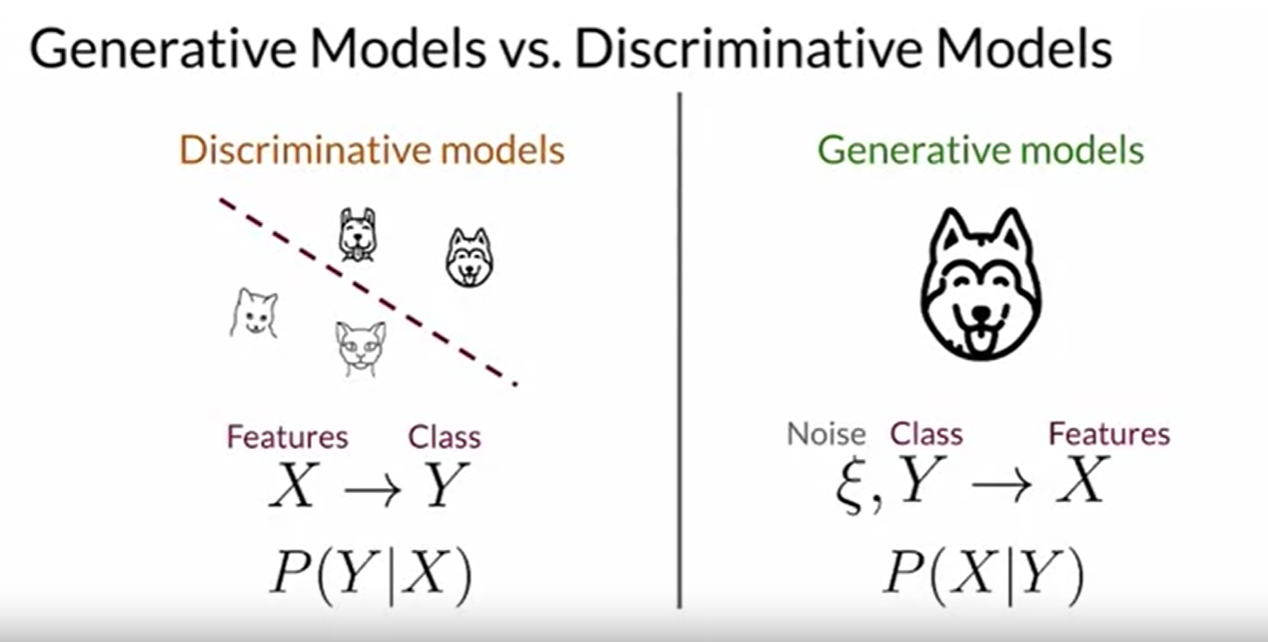


A discriminative model is one typically used for classification in machine learning. They learn how to distinguish between classes such as dogs and cats, and are often called classifiers. Discriminative models take a set of features X, such as having a wet nose or whether it purrs and from these features determine a category why of whether the image is of a dog or a cat. In other words, they try to model the probability of class Y given a set of features X as having a wet nose, but it doesn't purr, so it's probably a dog. On the other hand, generative models try to learn how to make a realistic representation of some class. 
More generally, generative models try to capture the probability distribution of X, the different features of having a wet nose, the tongue sticking out, maybe pointy ears sometimes but not all the time given that class Y of a dog. With the added noise,  model would generate realistic and diverse representations of the class Y. 

There are many types of generative models, the most popular are VAE and GANs.

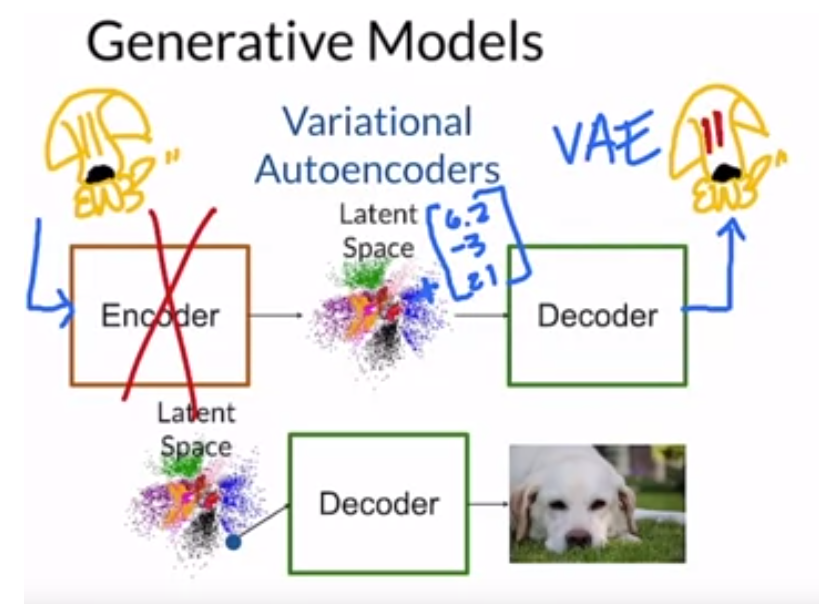

VAEs work with two models, an encoder and a decoder and these are typically neural networks. They learn first by feeding in realistic images into the encoder. Then the encoder's job is to find a good way of representing that image in the latent space.  What the VAE does now is take the latent representation or a point close to it and put it through the decoder. The goal of the decoder is to reconstruct the realistic image that the encoder saw before. 
The variational part in  VAE injects some noise into the whole model and training process. Instead of having the encoder encode the image into a single point in that latent space, the encoder actually encodes the image onto a whole distribution and then samples a point on that distribution to feed into the decoder to then produce a realistic image. This adds a little bit of noise since different points can be sampled from distribution.

Applications of GAN:

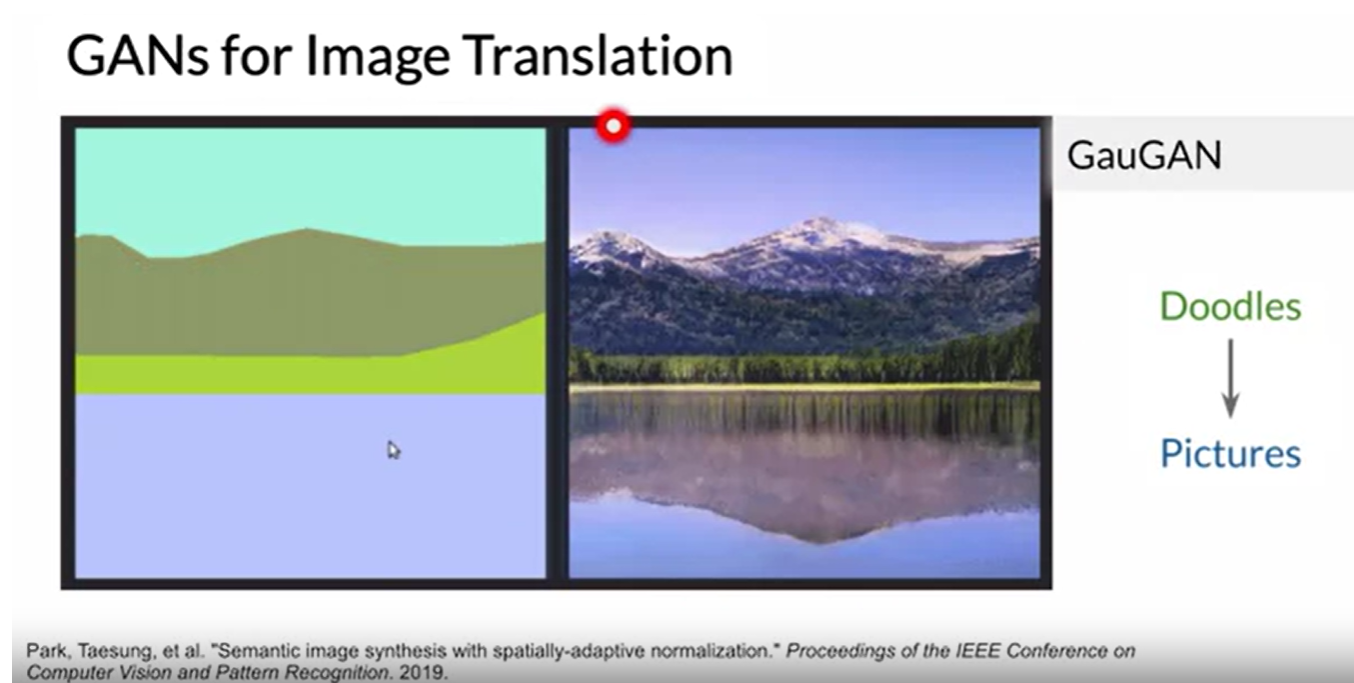

Although GAN has been around since 2014, it has already achieved super impressive performance across a multitude of tasks. Can generate human like faces with high resolution and soft backgrounds, perform image translation like transform a video of horse into zebra, draw photo realistic images from doodle, can animate still-life like images using motion of any real human face.

**Intuition behind GANs**

GANs have two components, one's called the generator and the other is called the discriminator. And these are typically two different neural networks.

The generator learns to generate fakes that look real, to fool the discriminator. And the discriminator learns to distinguish between what's real and what's fake.

At the beginning of the game generator doesn't know how to produce real looking artwork. Additionally, the generator isn't allowed to see the real images. So to start the competition, we train the discriminator using the real artwork so it's able to know which images are actually real. So after it decides, maybe this looks real, we actually tell it yes, that's real or no, that's fake. This way we can get a discriminator that's able to differentiate a fake image from generator, from the ones that are slightly better and eventually also the real ones. And the generator will know in what direction to go on and improve, by looking at the scores assigned to her work by the discriminator.


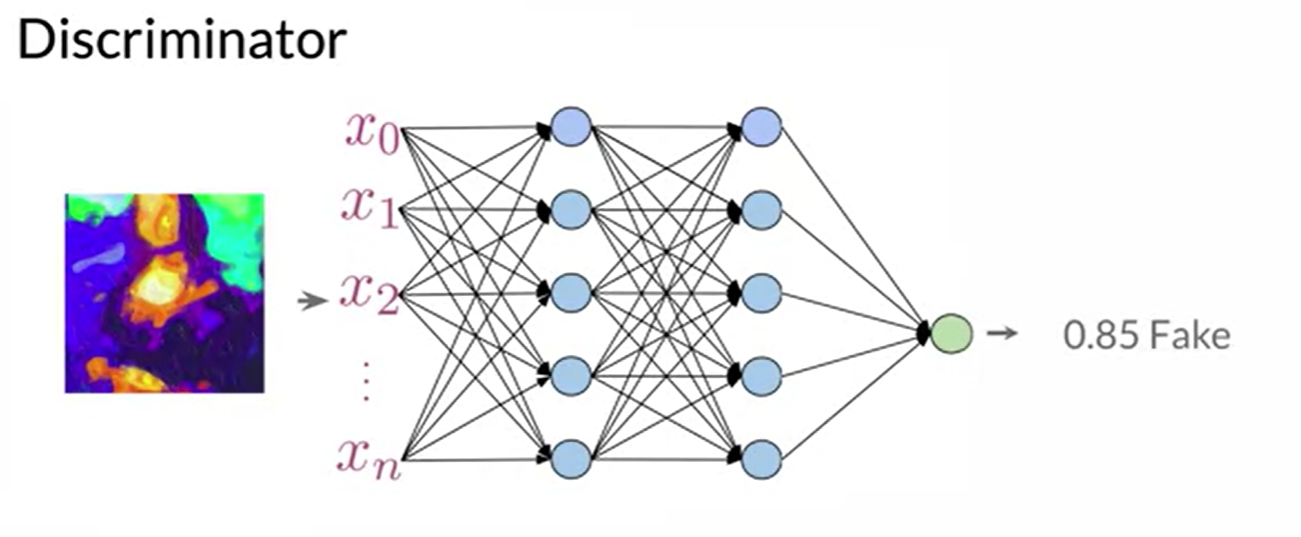

The discriminator is a classifier that inspects the examples. They're fake examples or the real examples, and determines whether it belongs to the real or fake class. So taking in this fake Mona Lisa here, the discriminator determines how fake this image is, and here it thinks it's 85% fake. In probabilistic terms, the discriminator models the probability of an example being fake given a set of inputs X. 

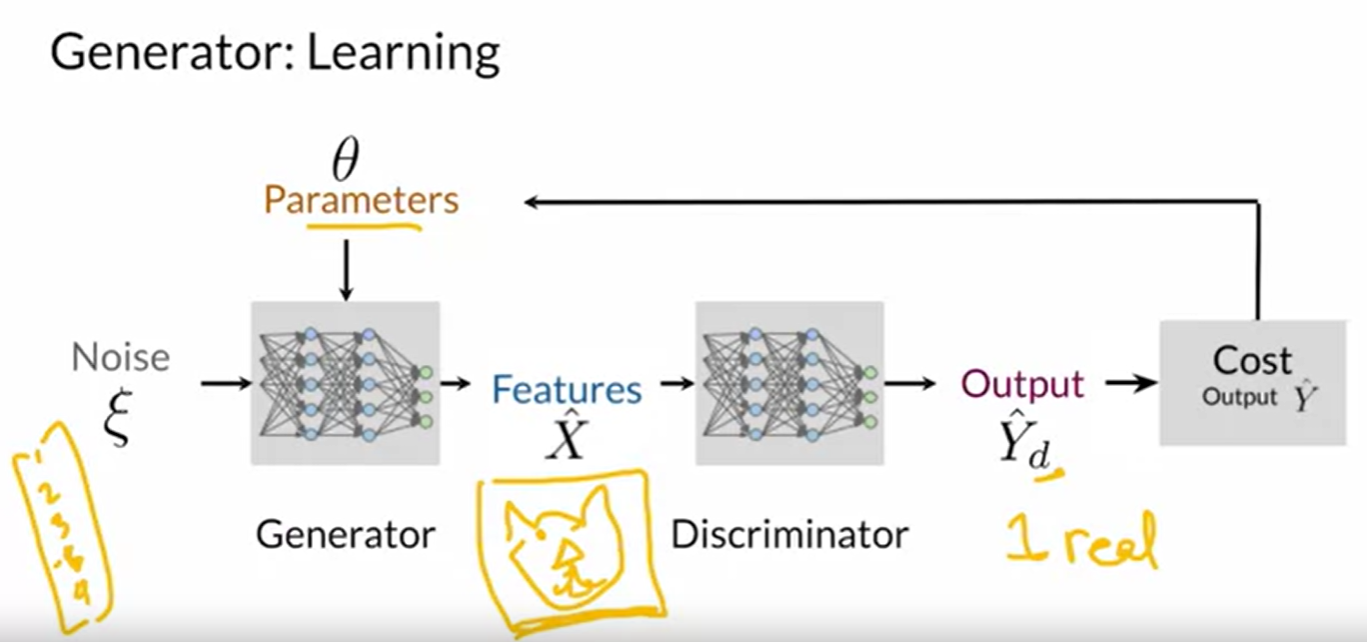

First, we have a noise vector or the random input values, pass this into a generator represented by a neural network to produce a set of features that can pose an image of a cat or an attempt at a cat. The generator will generate image using those set of fetures, that is fed into the discriminator. It determines how real and how fake it thinks based on its inspection of it. After that, from what the discriminator thinks of it, which is this y-hat with a D here representing that it's the discriminators predictions, we can compute a cost function that basically looks at how far the examples produced by the generator are being considered real by the discriminator because the generator wants this to seem as real as possible. So basically, the generator wants y-hat to be as close to one, meaning real as possible. Whereas, the discriminator is trying to get this to be zero, fake. The model uses the difference between these two to then update the parameters of the generator, and that gets it to improve over time and know which direction to move it's parameters to generate something that looks more real and will fool the discriminator. 

In the land of probability, the generator is trying to model the probability of the features of an example, given its class y. So this is the conditional probability of features X given the class Y.

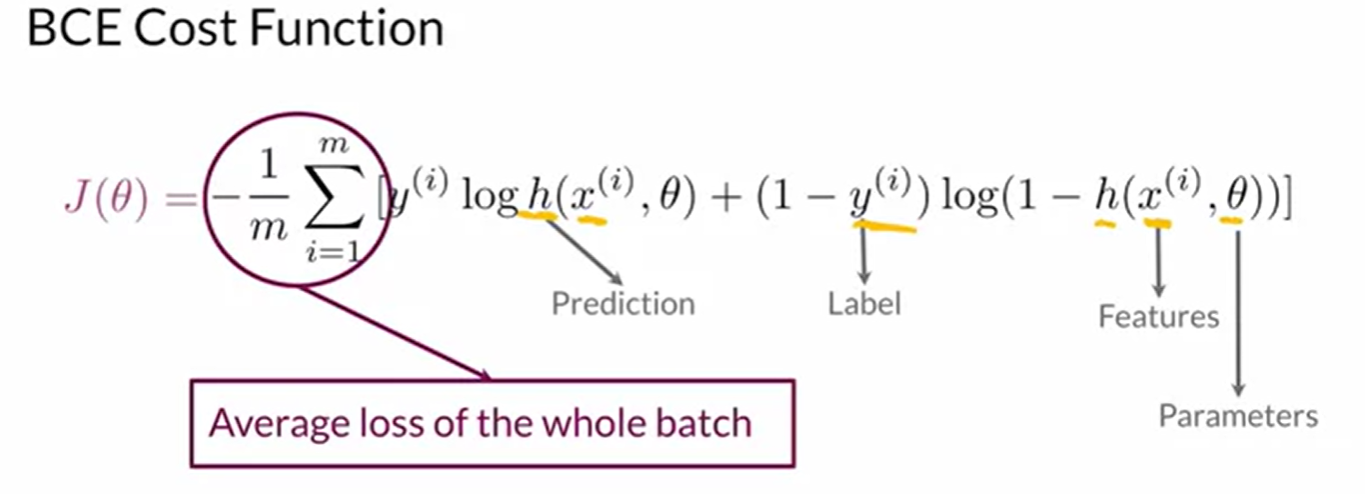

Binary Cross Entropy function, or BCE for short, is used for training GANs. It's useful for these models, because it's especially designed for classification tasks, where there are two categories like, real and fake.
If either of the terms evaluates to something really big in the negative direction, the negative sign at the start is crucial to making sure that is a positive number and positive infinity. Because for our cost function, what we typically want is a minimum cost, and our neural network is trying to reduce this value as much as possible. 


In [2]:
#Intro to PyTorch
import torch
#One way to create tensors from a list or an array is to use torch.Tensor
example = torch.Tensor([[1, 2], [3, 4], [4, 5]])
example

tensor([[1., 2.],
        [3., 4.],
        [4., 5.]])

In [3]:
#One important property is the device of the tensor. To view the device of the tensor, 
#all we need to write is example.device. 
#To move a tensor to a new device, we can write new_tensor = example.to(device) where device will be either cpu or cuda.

example.device

device(type='cpu')

In [4]:
#we can get the number of elements in each dimension by printing out the tensor's shape, using example.shape
example.shape

torch.Size([3, 2])

In [7]:
#We can also get the size of a particular dimension 𝑛 using example.shape[n] or equivalently example.size(n)
example.size(1)

2

In [12]:
#To access the  𝑛-th element, we can simply write example[n] - as with Python in general, these dimensions are 0-indexed.
example[1]

tensor([3., 4.])

In [14]:
#In addition, if you want to access the  𝑗-th dimension of the  𝑖-th example, we can write example[i, j]
example[1, 1]

tensor(4.)

In [8]:
#torch.ones_like: creates a tensor of all ones with the same shape and device as example.
torch.ones_like(example)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [9]:
#torch.zeros_like: creates a tensor of all zeros with the same shape and device as example.
torch.zeros_like(example)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [10]:
#torch.randn_like: creates a tensor with every element sampled from a Normal (or Gaussian) distribution with the same shape and device as example
torch.randn_like(example)

tensor([[-0.2353,  1.4850],
        [ 0.4672, -0.1141],
        [-0.6646,  2.0874]])

In [11]:
#Sometimes we you might need to initialize a tensor knowing only the shape and device, without a tensor for reference for ones_like or randn_like.
torch.randn(2, 2, device='cpu')

tensor([[ 1.0367, -0.2382],
        [ 1.2611,  0.8052]])

**PyTorch Neural Network Module (torch.nn)** 

In [15]:
import torch.nn as nn

#To create a linear layer, we need to pass it the number of input dimensions and the number of output dimensions. 
#The linear object initialized as nn.Linear(10, 2) will take in a  𝑛×10 matrix and return an  𝑛×2 matrix, where all 𝑛 elements have had the same linear transformation performed. 

linear = nn.Linear(10, 2)
input = torch.randn(3, 10)
output = linear(input)
output

tensor([[-0.7780, -0.4577],
        [ 0.8115, -0.2124],
        [ 0.7158, -0.1662]], grad_fn=<AddmmBackward0>)

In [16]:
#nn.ReLU() will create an object that, when receiving a tensor, will perform a ReLU activation function.
#A ReLU non-linearity sets all negative numbers in a tensor to zero. 

relu = nn.ReLU()
relu_output = relu(output)
relu_output

tensor([[0.0000, 0.0000],
        [0.8115, 0.0000],
        [0.7158, 0.0000]], grad_fn=<ReluBackward0>)

In [17]:
#nn.BatchNorm1d is a normalization technique that will rescale a batch of  𝑛 inputs to have a consistent mean and standard deviation between batches.
#nn.BatchNorm1d takes an argument of the number of input dimensions of each object in the batch (the size of each example vector).
batchnorm = nn.BatchNorm1d(2)
batchnorm_output = batchnorm(relu_output)
batchnorm_output

tensor([[-1.4059,  0.0000],
        [ 0.8350,  0.0000],
        [ 0.5709,  0.0000]], grad_fn=<NativeBatchNormBackward0>)

In [20]:
#nn.Sequential creates a single operation that performs a sequence of operations.

first_layer = nn.Sequential(
    nn.Linear(5, 2),
    nn.BatchNorm1d(2),
    nn.ReLU()
)

In [21]:
# To create optimier use the torch.optim module, often imported as optim. optim.Adam corresponds to the Adam optimizer.
import torch.optim as optim
adam_opt = optim.Adam(first_layer.parameters(), lr=1e-1)

From DeepLearning.ai course